Задания для самостоятельного решения
Замечание: 1 Предполагается, что для решения заданий № 1-3 будут использоваться разные тесты.

Замечание: 2 Для зачета уже достаточно половины абсолютно верно решенных заданий.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут)

Задание № 1 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

2 +2 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [3]:
stats.mannwhitneyu?

In [4]:
#H0 - Эффект от применения препаратов А и В одинаковый
#H1 - Эффект от применения препаратов А и В различается

st, p = stats.mannwhitneyu(A,B)  # Используем критерий Манна-Уитни, так как выборки независимы

print(f'Statistics={st}, p={p}')

alpha = 0.05 
if p > alpha:
    print('Различий нет (не отвергаем H0)')
else:
    print('Различия есть (отвергаем H0)')

Statistics=4343.0, p=0.10869536089322271
Различий нет (не отвергаем H0)


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

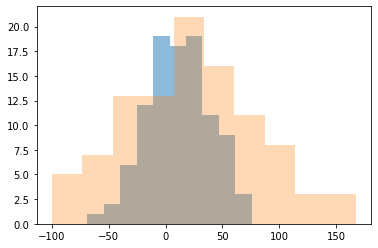

In [5]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.3)

     Задание № 2 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
А - группа людей без препарата.

B - та же группа людей, но получающая препарат                   

In [6]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [7]:
#H0 - Эффект от применения препаратов А и В одинаковый
#H1 - Эффект от применения препаратов А и В различается


st, p = stats.wilcoxon(A, B) # Выборки зависимы поэтому используем Критерий Вилкоксона
print(f'Statistics={st}, p={p}')

alpha = 0.05 
if p > alpha:
    print('Различий нет (не отвергаем H0)')
else:
    print('Различия есть (отвергаем H0)')

Statistics=1930.0, p=0.04077572901549266
Различия есть (отвергаем H0)


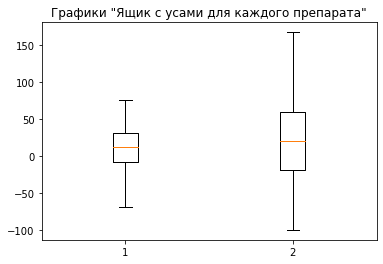

In [8]:
data = [A, B]
fig7, ax7 = plt.subplots()
ax7.set_title('Графики "Ящик с усами для каждого препарата"')

ax7.boxplot(data)

plt.show()

Задание № 3 (Обязательно) Допустим вы решили устроить дачный эксперимент.<u> Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.</u>
<b>Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?</b>
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist\
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [9]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

In [10]:
#H0 - Эффекта от использования минералки, воды или удобрений нет
#H1 - Эффект от  минералки, воды или удобрений возможен
from scipy.stats import f_oneway

F, p = f_oneway(water, nutri, mineral)  # используем дисперсионный анализ

alpha = 0.05  

print(F, p)  

if p > alpha:
    print('Одинаковые распределения (нельзя отклонить H0)')
else:
    print('Разные распределения (отвергаем H0)')

12.525963044834192 2.9240047906326866e-05
Разные распределения (отвергаем H0)


Так же для срванения 3х и более выборрок можем использовать <b>Критерий Краскела-Уоллиса</b>

In [11]:
#H0 - Эффекта от использования минералки, воды или удобрений нет
#H1 - Эффект от  минералки, воды или удобрений возможен
from scipy.stats import mstats

H, pval = mstats.kruskalwallis(water, nutri, mineral)

['Разные распределения (отвергаем H0)', 'Одинаковые распределения (нельзя отклонить H0)'][p > 0.05]

C:\Users\Ivan\AppData\Local\Temp/ipykernel_3056/1788041943.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ['Разные распределения (отвергаем H0)', 'Одинаковые распределения (нельзя отклонить H0)'][p > 0.05]


'Разные распределения (отвергаем H0)'

<b>Есть ли эффект от удобрения по сравнению с минералкой? </b>

In [12]:
#H0 - Эффекта от использования минералки и удобрений нет
#H1 - Эффект от применения минералки и удобрений возможен

st, p = stats.mannwhitneyu(nutri, mineral)  # Используем критерий Манна-Уитни, так как выборки независимы

print(f'Statistics={st}, p={p}')

alpha = 0.05 
['Различия есть (отвергаем H0)', 'Различий нет (не отвергаем H0)'][p > alpha]

Statistics=363.5, p=0.00027427987333505563


C:\Users\Ivan\AppData\Local\Temp/ipykernel_3056/602274715.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ['Различия есть (отвергаем H0)', 'Различий нет (не отвергаем H0)'][p > alpha]


'Различия есть (отвергаем H0)'

Вывод : <u>Эффект от применения минералки и удобрений возможен </u>

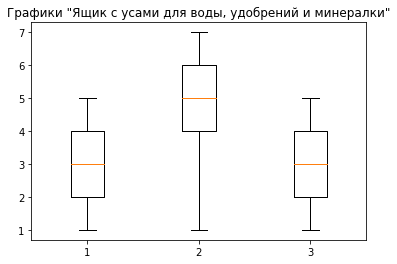

In [13]:
data = [water, nutri, mineral]
fig7, ax7 = plt.subplots()
ax7.set_title('Графики "Ящик с усами для воды, удобрений и минералки"')

ax7.boxplot(data)

plt.show()

(array([4., 0., 5., 0., 0., 5., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

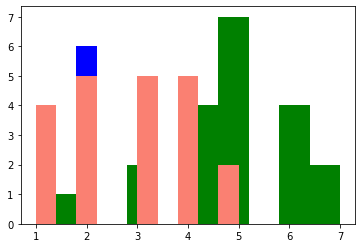

In [14]:
plt.hist(water, bins=10, color='blue')
plt.hist(nutri, bins=10, color='green')
plt.hist(mineral, bins=10, color='salmon')

In [15]:
#H0 - Эффекта от использования минералки и удобрений нет
#H1 - Эффект от применения минералки и удобрений возможен

st, p = stats.mannwhitneyu(water, mineral)  # Используем критерий Манна-Уитни, так как выборки независимы

print(f'Statistics={st}, p={p}')

alpha = 0.05 
['Различия есть (отвергаем H0)', 'Различий нет (не отвергаем H0)'][p > alpha]

Statistics=213.5, p=0.9360243114411135


C:\Users\Ivan\AppData\Local\Temp/ipykernel_3056/3154122774.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ['Различия есть (отвергаем H0)', 'Различий нет (не отвергаем H0)'][p > alpha]


'Различий нет (не отвергаем H0)'

Вывод: при анализе трех способов полива, заментно, что использование удобрений больше всего вносит изменений в результат.\
При этом значимых различий между водой и минералкой замечено не было 

<b><mark>Cookie Cats (Обязательно)</mark><b>

<mark>Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.</mark>

<b>Но где ставить ворота?</b> Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats <u>с 30 уровня на уровень 40.</u> В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

In [16]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

C:\Users\Ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

<b>userid</b> - уникальный номер, идентифицирующий каждого игрока.

<b>version</b> - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

<b>sum_gamerounds</b> - количество игровых раундов, сыгранных игроком в течение первой недели после установки

<b>retention_1</b> - пользователь вернулся и поиграл через 1 день после установки?

<b>retention_7</b> - пользователь вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать seaborn c его sns.boxplot/sns.carplot, sns.barplot, но можно обойтись и обычном matplotlib

In [17]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


В контрольную группу было помещено 44700 игроков, в тестовую - 45489,
обе группы приблизительно равны - поправка на различие групп (Критерий Уэлча) не требуется

Выши выводы: большинство игроков в течение первой недели установки сыграли в небольшое кол-во раундов


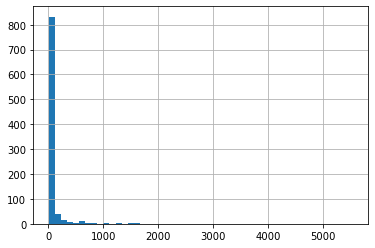

In [18]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=50) 
print('Выши выводы: большинство игроков в течение первой недели установки сыграли в небольшое кол-во раундов')


Text(0.5, 0, '№ Игрового раунда')

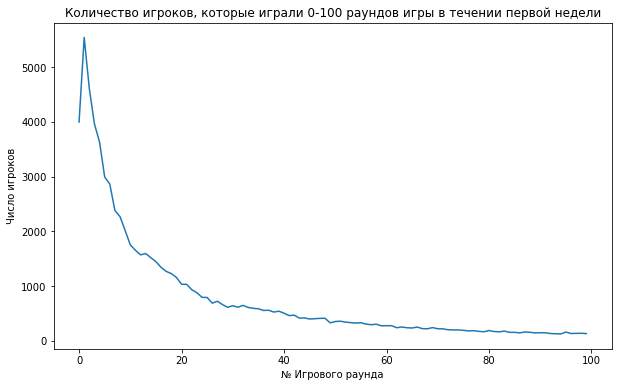

In [32]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')

In [ ]:
boot_7d.head()

boot_7d.head()

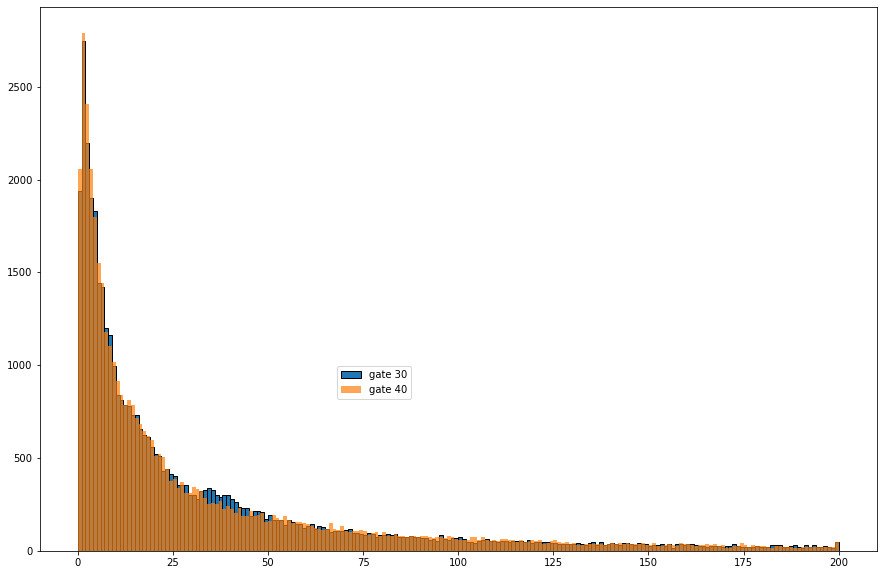

In [19]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

<AxesSubplot:ylabel='Density'>

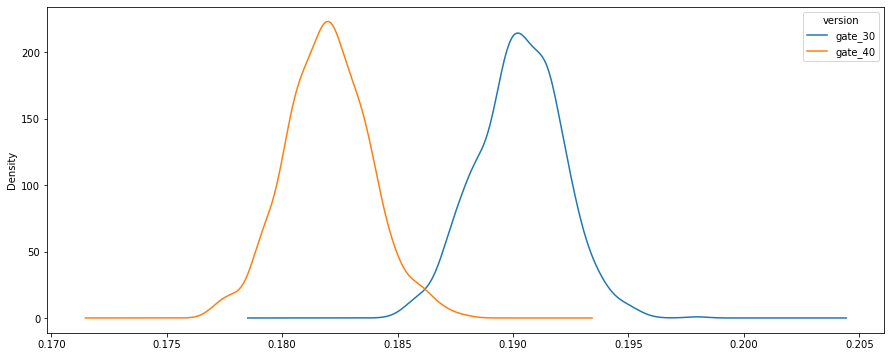

In [31]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Ваши выводы: Из графиков видно, что для контрольной выборки кол-во оставшихся игроков больше (пик приблизительно на 0.183),
чем для тестовой (пик приблизительно на 0.19) Напрашивается, что установка ограничения на 30-м уровне лучше, чем на 40. 
Проверим наше предположение, что использование ограничения на 30-м уровне предпочтительнее.

In [41]:
# Разбиваем датасет на две выборки: тестовую и контрольную
level_30 = data[['retention_7']].loc[data.version == 'gate_30']
level_40 = data[['retention_7']].loc[data.version == 'gate_40']

In [42]:
#Используем дисперсионный анализ
from scipy.stats import f_oneway
f_oneway(level_30, level_40)

F_onewayResult(statistic=array([10.01405708]), pvalue=array([0.00155402]))

Вывод: Мы отвергаем нулевую гипотезу о равенстве средних, так как p_value меньше 0.05 Так как статистика положительна (10.01405708), то установка ограничений на уровне 30 статистически обоснована.